In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from numpy import genfromtxt
from scipy.stats import norm
from scipy.special import factorial
from scipy.optimize import curve_fit
from collections import Counter

In [4]:
def gauss(x,a,x0,sigma):
  #print(x, a, x0, sigma)
  return a*np.exp(-(x-x0)**2/(2*sigma**2))

def poisson(k, lamb, scale):
  return scale*(lamb**k/factorial(k))*np.exp(-lamb)

def minmax(x):
  return print(min(x), max(x))

In [58]:
def plot(x, title, weights):
    xRange = set(x)
    minX, maxX = min(xRange), max(xRange)
    mu, sigma = norm.fit(x)
 
    n, bins, patches = plt.hist(x, bins=list(xRange), label= "Counting Rate =" + str(round(mu, 3)) +"\u00B1" + str(np.sqrt(mu)), weights=weights)
    bins = bins[:len(bins) - 1] + 0.5
    poptG, pcovG = curve_fit(gauss, bins, n, p0 = (1, mu, sigma))
    poptP, pcovP = curve_fit(poisson, bins, n, p0 = [mu, sigma])
    
    fig = plt.figure(facecolor="0.98")
    fit = fig.add_subplot(311)
    fit.plot(bins, gauss(bins, *poptG), '--r', label = "Gaussian Fit")
    fit.plot(bins, poisson(bins, *poptP), '--y', label = "Poisson Fit")
    
    plt.xticks(ticks = range(minX, maxX + 1))
    plt.title(title)
    plt.xlabel("Decay Events Per Time Interval")
    plt.ylabel('Number of Occurences')
    plt.legend()

    plt.gcf().set_size_inches(10, 5)

    # for i in enumerate(n):
    #     y_fit = gauss(bins,*poptG)
    #     # print(len(y_fit))
    #     # print(len(n))
    #     # print(bins)
    #     y_residual = n - y_fit
    
    

    # # separate plot to show residuals
    # residuals = fig.add_subplot(312) # 3 rows, 1 column, subplot 2
    # residuals.errorbar(x, y_residual, yerr=1, xerr=1, fmt='r+', label="Residuals")
    # # make sure residual plot has same x axis as fit plot
    # residuals.set_xlim(fit.get_xlim())
    # residuals.axhline(y=0) # draw horizontal line at 0 on vertical axis
    # plt.show()

# Calculate residuals (difference between data and fit)


# E3

In [56]:
df = pd.read_csv("E3.csv", skiprows=1)

E3 = []
for column in df:
    E3.append(list(df[column]))
del E3[0::2] # delete time columns from data list
# Now, data[i] corresponds to run i

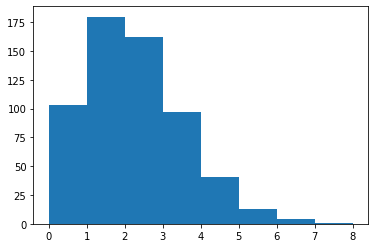

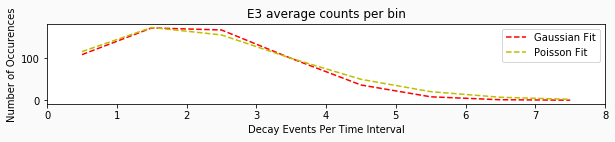

In [59]:
E3_flat = (np.array(E3)).flatten()
E3_flat = list(E3_flat) # combine all runs into one list
weights = np.ones(len(E3_flat))*0.05 # divide counts in all bins by 20

plot(E3_flat, "E3 average counts per bin", weights)

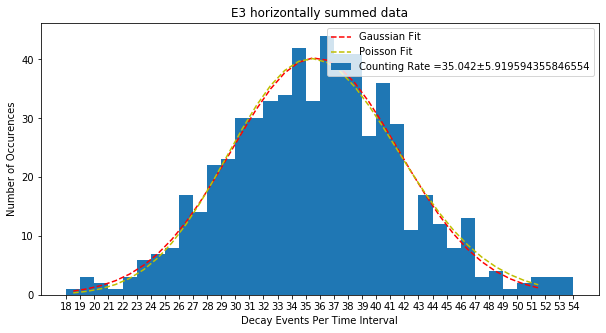

In [8]:
summed_data_hor = []
counter = 0
for j in range(len(E3[0])):
    for i in range(len(E3)):
        counter = counter + E3[i][j]
    summed_data_hor.append(counter)
    counter = 0

plot(summed_data_hor, 'E3 horizontally summed data', np.ones(len(summed_data_hor)))

<BarContainer object of 20 artists>

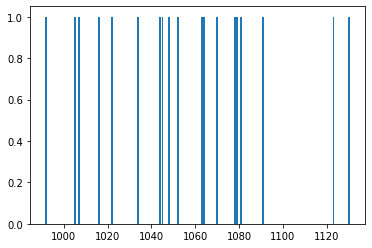

In [19]:
E3_copy = []
for i in range(len(E3)):
    E3_copy.append(np.sum(E3[i]))

plt.bar(E3_copy, height=1)

# E4

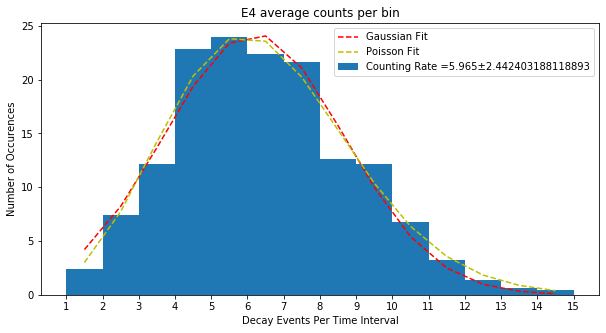

In [20]:
df = pd.read_csv("E4.csv", skiprows=1)

E4 = []
for column in df:
    E4.append(list(df[column]))
del E4[0::2] # delete time columns from data list
# Now, data[i] corresponds to run i

E4_flat = (np.array(E4)).flatten()
E4_flat = list(E4_flat) # combine all runs into one list
weights = np.ones(len(E4_flat))*0.2 # divide counts in all bins by 5

plot(E4_flat, "E4 average counts per bin", weights)